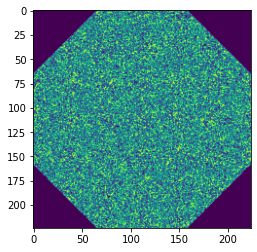

In [15]:
import torch
import kornia as K
from matplotlib import pyplot as plt

x = torch.rand(2, 12, 224, 224)
x = K.geometry.transform.rotate(x.float(), torch.tensor([45, 45]).float())

plt.imshow(x[0, 0].numpy())